In [10]:
# Import necessary libraries
from fnal import Dataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform, plot_ffts, plot_planes_new

In [55]:
20 + int('0x3C00', 16) * (130 / int('0xFFFF', 16))
20 + int('0x7400', 16) * (130 / int('0xFFFF', 16))

78.90714885175859

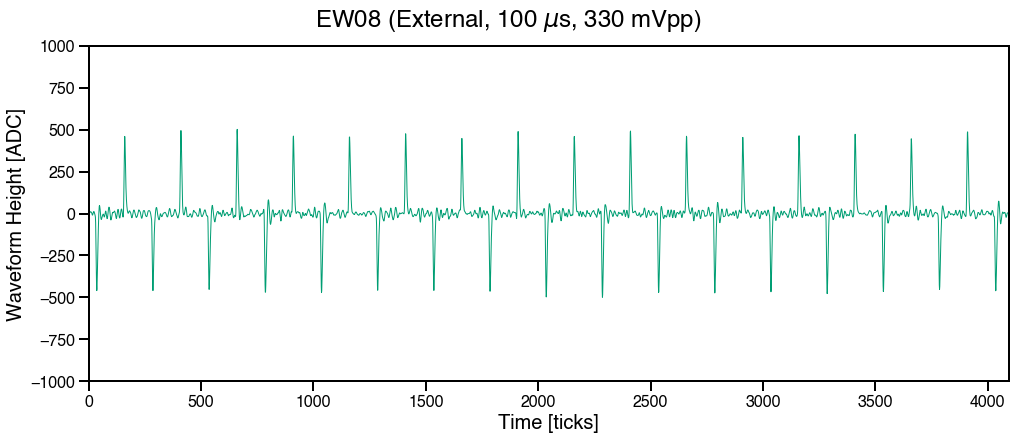

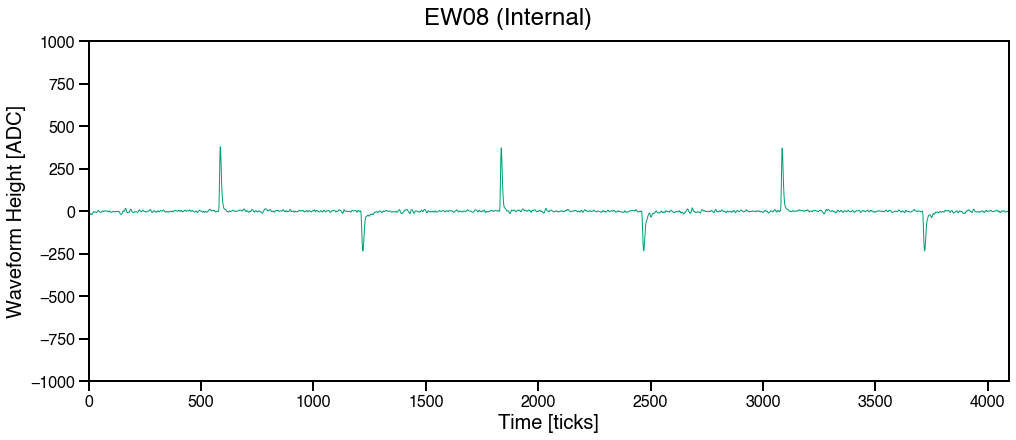

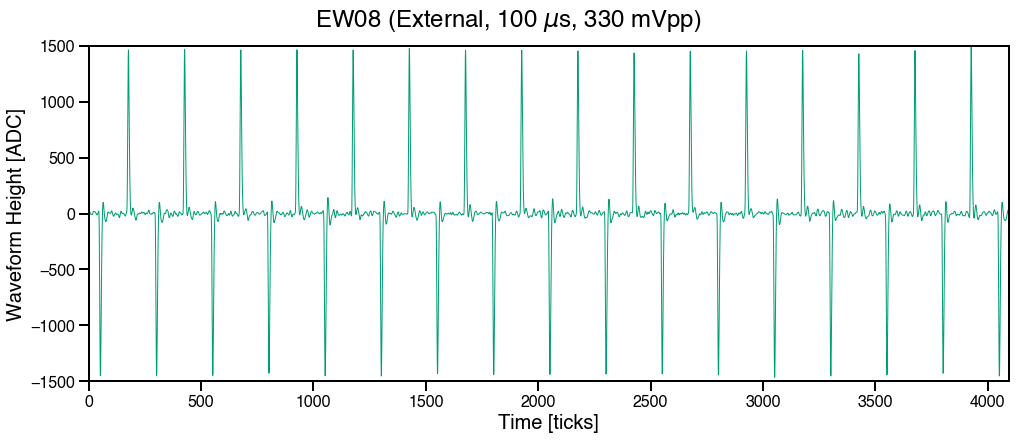

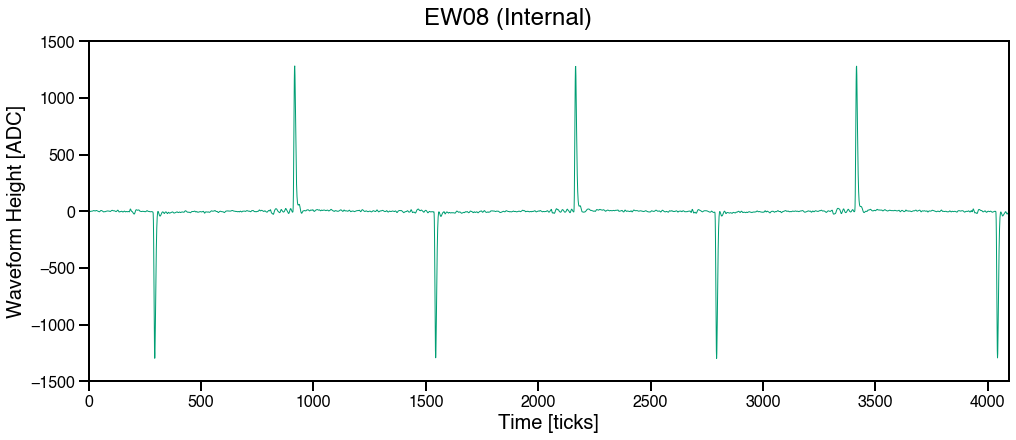

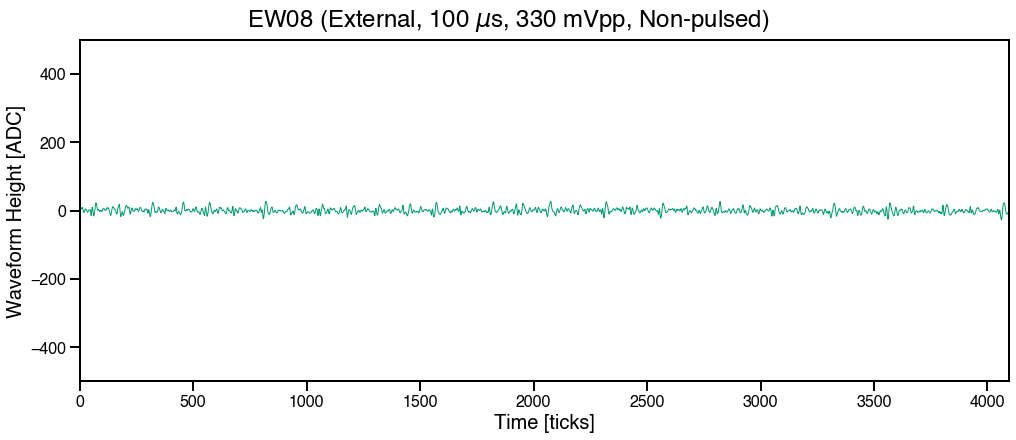

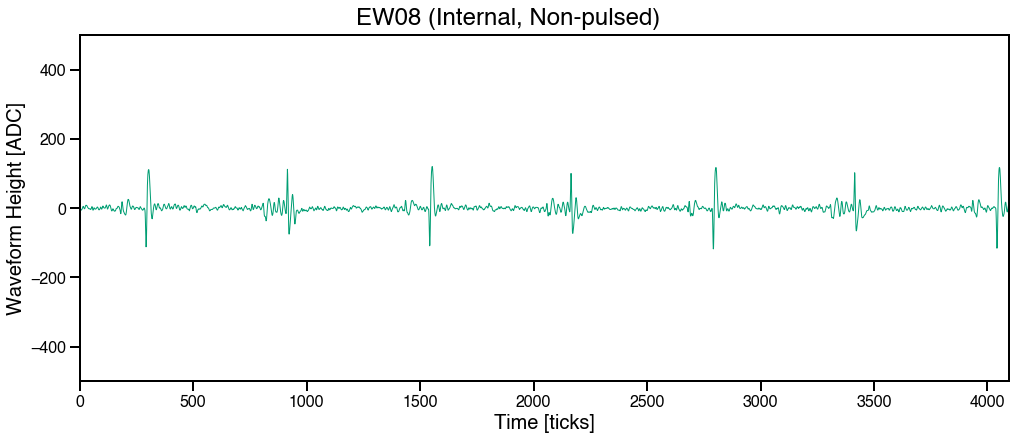

In [56]:
import numpy as np
import matplotlib.pyplot as plt

path = '/Users/mueller/Downloads/waveforms/'
def plot_waveform_new(path, run, title, evt=1, ch=0, scale=2200):
    waveform = np.array([x.strip('\n').split(',') for x in open(f'{path}run{run}_frag4626_evt{evt}').readlines()], dtype=float)[ch,:]
    plt.style.use('plot_style.mplstyle')
    figure = plt.figure(figsize=(14,6))
    ax = figure.add_subplot()
    ax.plot(np.arange(4096), waveform, linestyle='-', linewidth=1)
    ax.set_xlim(0,4096)
    ax.set_ylim(-scale, scale)
    ax.set_xlabel('Time [ticks]')
    ax.set_ylabel('Waveform Height [ADC]')
    figure.suptitle(title)

#plot_waveform_new(path, 10214, 'EW08 (TT-Link, 50 $\mu$s, 3.3 Vpp)')
#plot_waveform_new(path, 10216, 'EW08 (Board, 50 $\mu$s, 3.3 Vpp)')
#plot_waveform_new(path, 10217, 'EW08 (Board, 50 $\mu$s, 2.0 Vpp)')
#plot_waveform_new(path, 10218, 'EW08 (Board, 25 $\mu$s, 3.3 Vpp)')
#plot_waveform_new(path, 10219, 'EW08 (Board, 10 $\mu$s, 3.3 Vpp)')
#plot_waveform_new(path, 10220, 'EW08 (Board, 10 $\mu$s, 330 mVpp)')
#plot_waveform_new(path, 10221, 'EW08 (Board, 100 $\mu$s, 330 mVpp)')
#plot_waveform_new(path, 10222, 'EW08 (Board, 100 $\mu$s, 1.0 Vpp)')
#plot_waveform_new(path, 10223, 'EW08 (TT-Link, 100 $\mu$s, 1.0 Vpp)')
plot_waveform_new(path, 10221, 'EW08 (External, 100 $\mu$s, 330 mVpp)', ch=0, scale=1000)
plot_waveform_new(path, 9719, 'EW08 (Internal)', ch=65, scale=1000)
plot_waveform_new(path, 10222, 'EW08 (External, 100 $\mu$s, 330 mVpp)', ch=0, scale=1500)
plot_waveform_new(path, 9719, 'EW08 (Internal)', ch=513, scale=1500)

plot_waveform_new(path, 10222, 'EW08 (External, 100 $\mu$s, 1.0 Vpp, Non-pulsed)', ch=64, scale=500)
plot_waveform_new(path, 9719, 'EW08 (Internal, Non-pulsed)', ch=512, scale=500)

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10097), Dataset(input_path, '09394')]
labels = ['Run 10097', 'Run 9394']

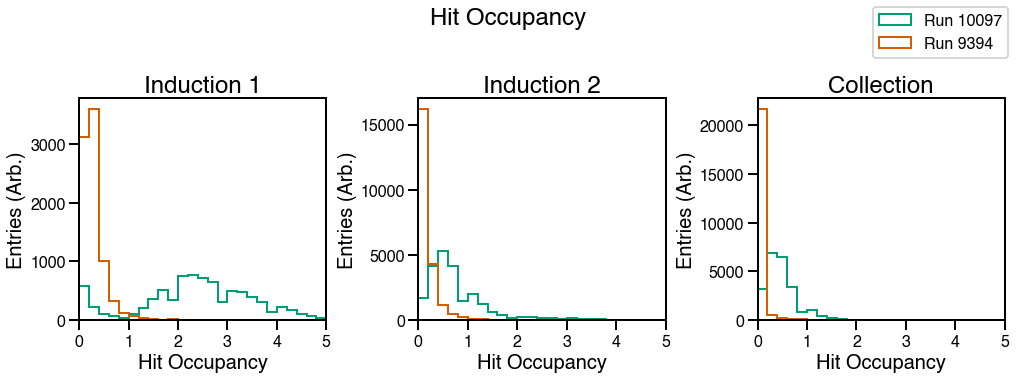

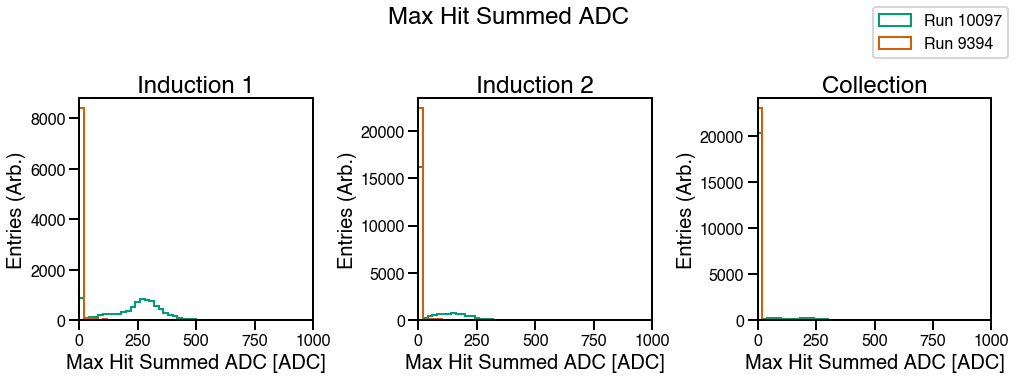

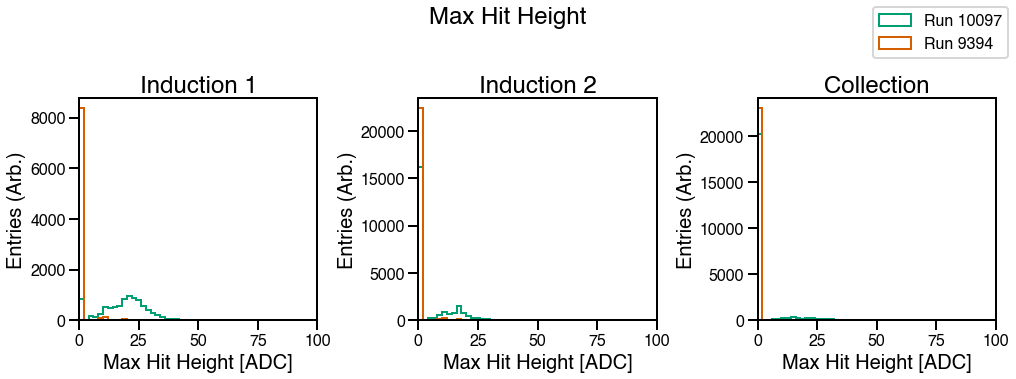

In [4]:
plot_planes_new(data, labels, 'hit_occupancy', 'Hit Occupancy')
plot_planes_new(data, labels, 'mhit_sadc', 'Max Hit Summed ADC')
plot_planes_new(data, labels, 'mhit_height', 'Max Hit Height')

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10169), Dataset(input_path, 10174)]
labels = ['Run 10169 (1 kHz)', 'Run 10174 (2 kHz)']

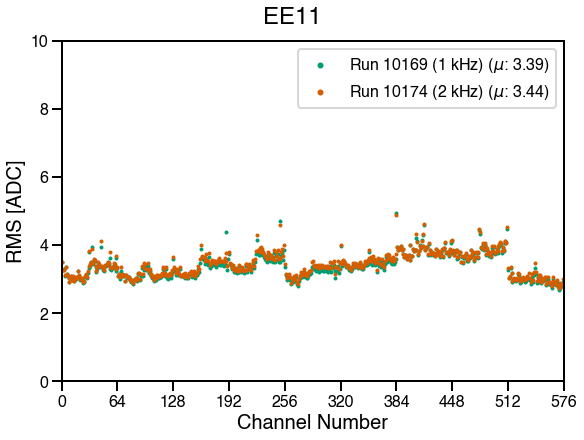

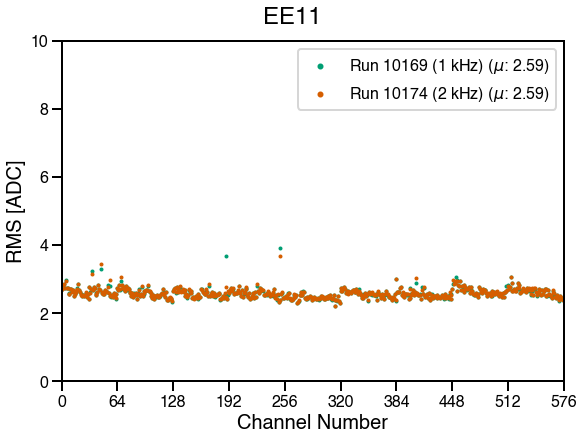

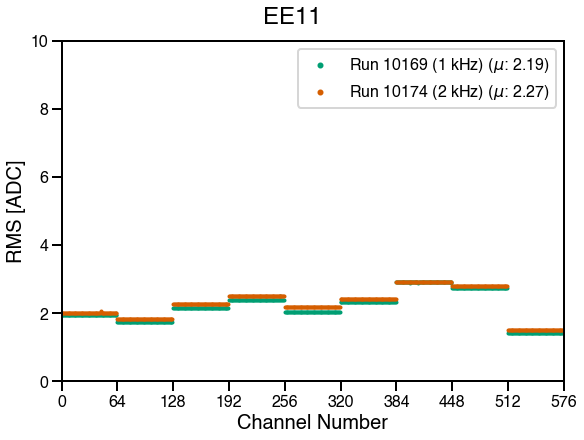

In [4]:

plot_crate(data, labels, metric='raw_rms', component='EE11', label_mean=True)
plot_crate(data, labels, metric='int_rms', component='EE11', label_mean=True)
plot_crate(data, labels, metric='coh_rms', component='EE11', label_mean=True)

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10097), Dataset(input_path, '0001', mc=True)]
labels = ['Run 10097', 'Monte Carlo']

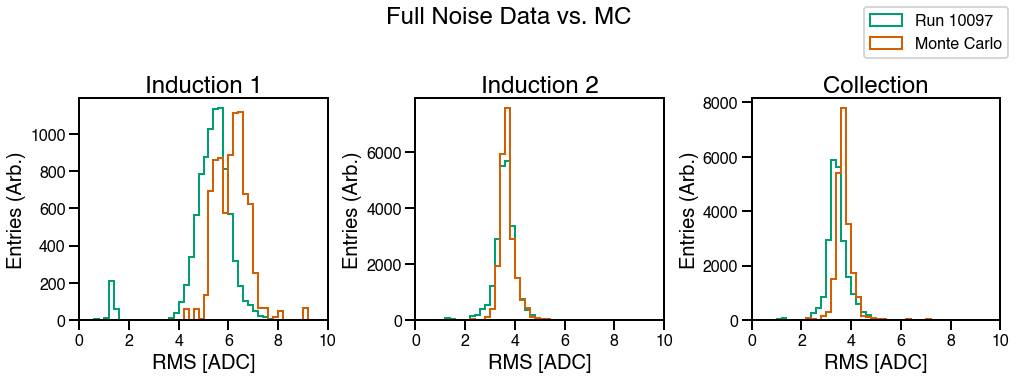

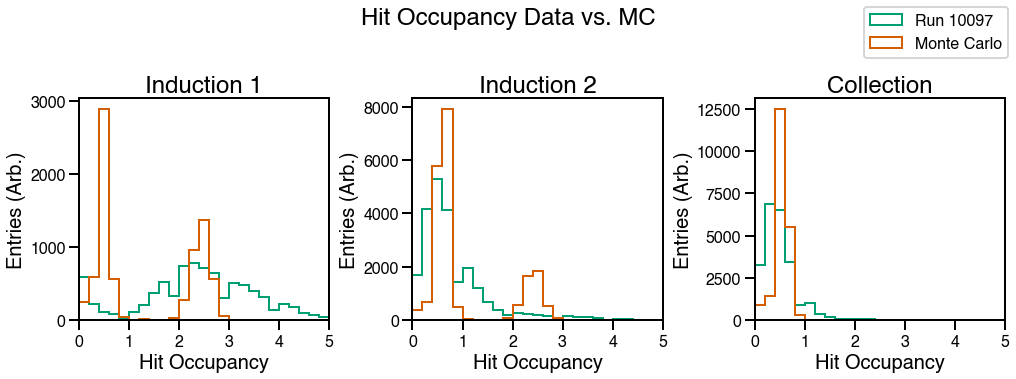

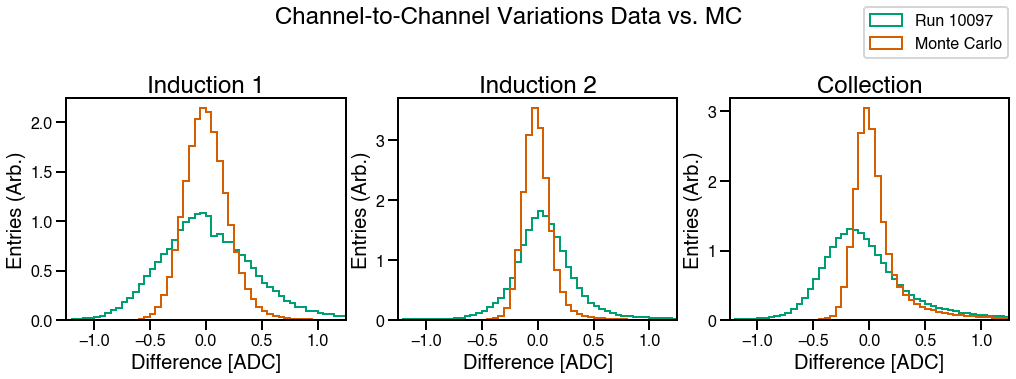

In [5]:
plot_planes_new(data, labels, 'raw_rms', 'Full Noise Data vs. MC')
plot_planes_new(data, labels, 'hit_occupancy', 'Hit Occupancy Data vs. MC')
plot_planes_new(data, labels, 'raw_rms_c2cabs', 'Channel-to-Channel Variations Data vs. MC', normalize=True)

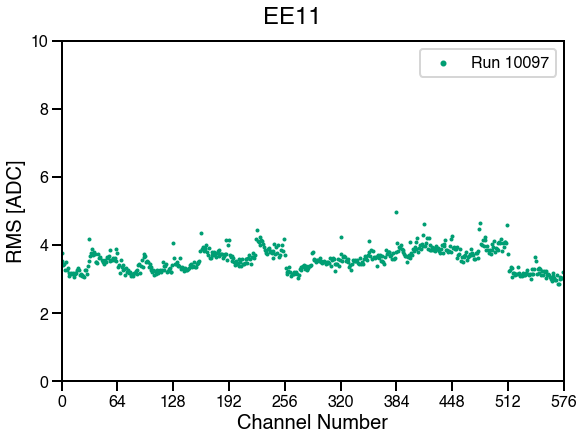

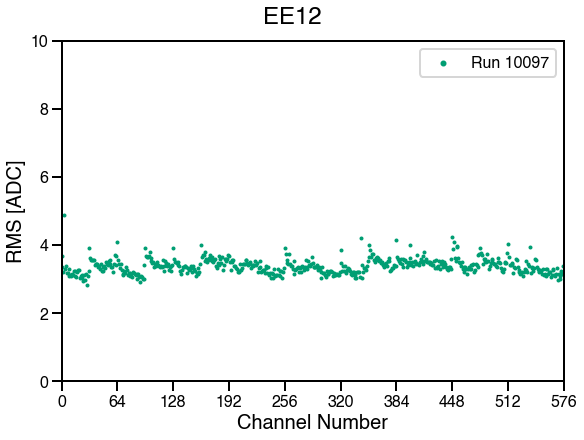

In [15]:
plot_crate([data[0],], [labels[0],], metric='raw_rms', component='EE11')
plot_crate([data[0],], [labels[0],], metric='raw_rms', component='EE12')

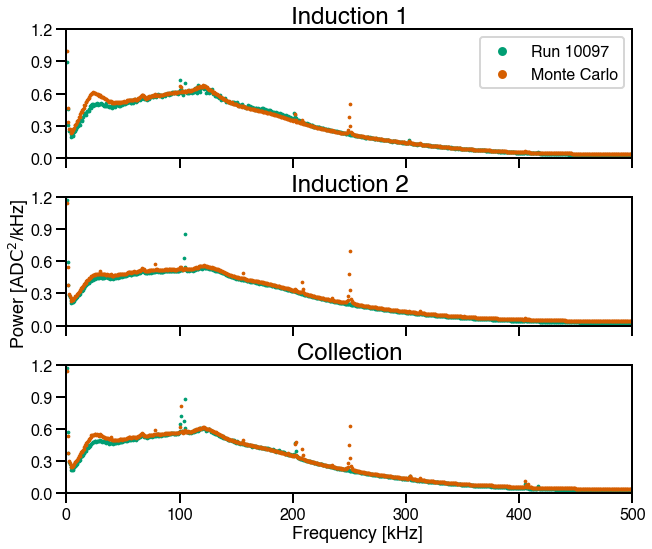

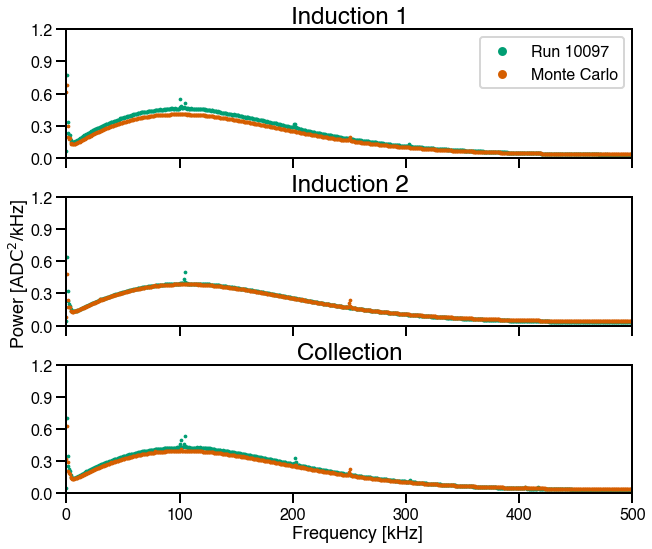

In [3]:
# Comparison of FFTs in data and MC.
plot_ffts(data, labels, 'raw')
plot_ffts(data, labels, 'int')

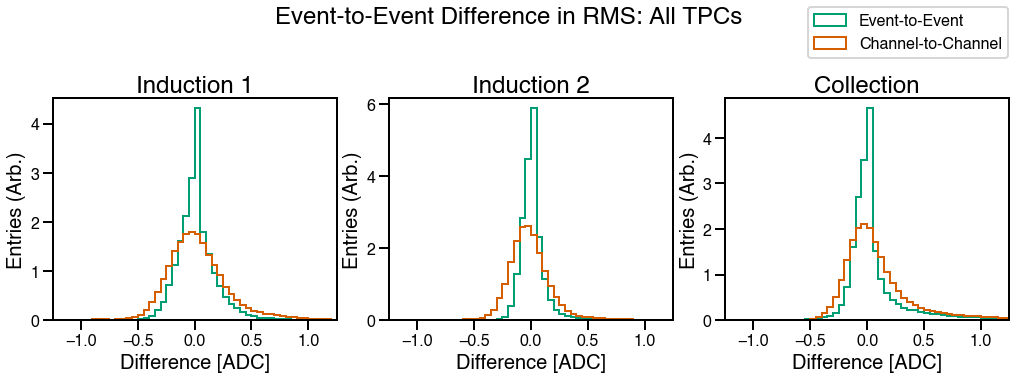

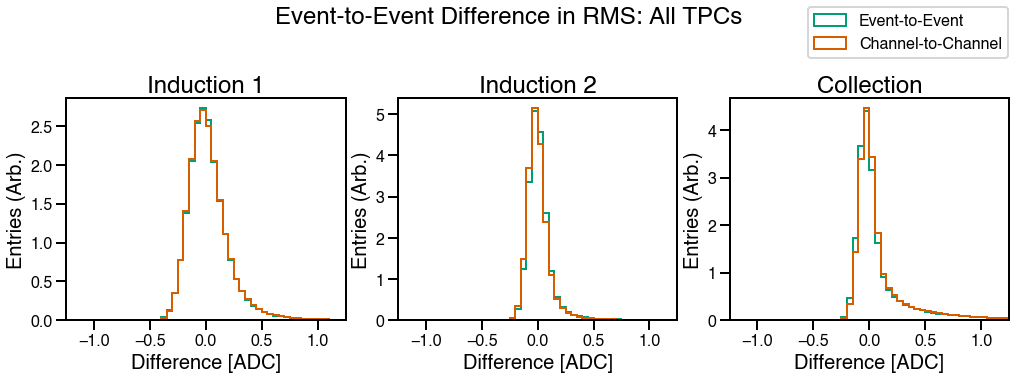

In [9]:
# Comparison of event-to-event and channel-to-channel variations between data and MC.
plot_planes(data[0], 'int_rms', ['e2eabs', 'c2cabs'])
plot_planes(data[1], 'int_rms', ['e2eabs', 'c2cabs'])

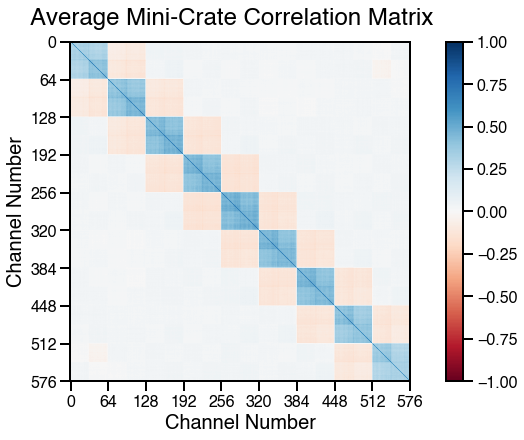

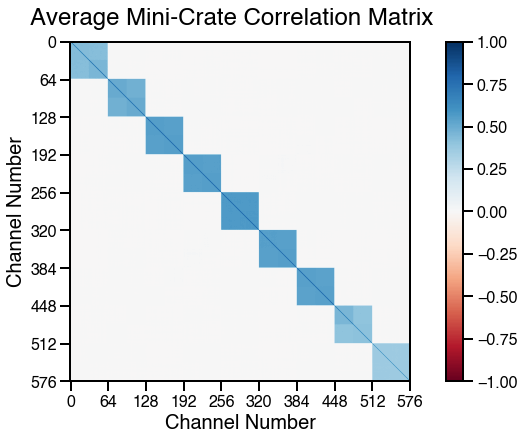

In [10]:
# Comparison of correlation matrices between data and MC.
data[0].plot_correlation_matrix('all')
data[1].plot_correlation_matrix('all')